In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/ITS Labs/Lab 05

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/ITS Labs/Lab 05


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

A Motion Tracking



60
60


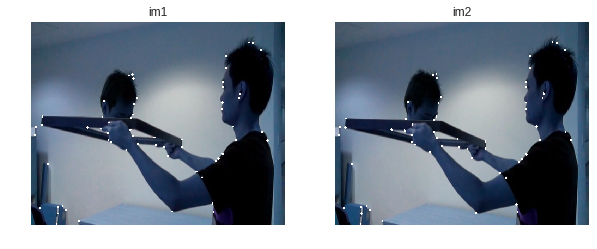

In [3]:
#this is the original code given in the lab materials and I have changed some arguments to get a better results


# Read two images.
im1 = cv2.imread("motion0025.jpg")
im2 = cv2.imread("motion0026.jpg")
gs_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gs_im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
width, height = gs_im1.shape

# Get good features to track
p0 = cv2.goodFeaturesToTrack(gs_im1, 60, 0.01, 10.0, False)

# Call tracker.
p1, st, err = cv2.calcOpticalFlowPyrLK(gs_im1, gs_im2, p0, None, (3,3))
print(len(p1))

for i,(new,old) in enumerate(zip(p1,p0)):
    a,b = new.ravel()
    c,d = old.ravel()
    im1 = cv2.circle(im1,(c,d),3,(255,255,255),-1)
    im2 = cv2.circle(im2,(a,b),3,(255,255,255),-1)

print (len(p1))

plt.figure(figsize=(10, 20), facecolor='white')

plt.subplot(1, 2, 1)
plt.imshow(im1, 'gray')
plt.title('im1')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(im2, 'gray')
plt.title('im2')
plt.axis("off")

plt.show()

Modified for video readings

In [0]:
#please note that running this cell gives 'Traceback' error due to end of the video file
#but the purpose of the code has been achived
#since this is running on jupyter notebook, please check the desktop area while running the cell to watch the video, it might not auto redirects to the video playback


#reading the video by using cv2 inbuilt function
cap = cv2.VideoCapture("motion.avi")


#capturing the first frame
ret, old_frame = cap.read()

#converting to grayscale
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

#get good features to track
p0 = cv2.goodFeaturesToTrack(old_gray, 60, 0.01, 10.0, False)

#broadcasting a mask with zeros, to the size of captured image size from the video
mask = np.zeros_like(old_frame)


#since this is a video, using a while loop
while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #calls tracker
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, (3,3))
    good_new = p1[st==1]
    good_old = p0[st==1]

    for i,(new, old) in enumerate(zip(p1, p0)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), (255,255,255), 2)
        frame = cv2.circle(frame, (a,b),5,(255,255,255), -1)
    img = cv2.add(frame, mask)

    cv2.imshow('frame', img)
    
    #just to delay the frames
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
        
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()
cap.release()

B Enhance the Motion Tracking

for this exercise i have avoided using loops purposely. also cv2.buildOpticalFlowPyramid() worked for me when i get its results to a tuple i went through opencv documentation and realised it can be used as below

In [0]:
#read two images
image1 = cv2.imread('motion0025.jpg', 0)
image2 = cv2.imread('motion0026.jpg', 0)

In [0]:
#pyramid level 2



#get the output from the pyramid build function from Opencv “cv2.buildOpticalFlowPyramid”
r1, level2_pyramid1 = cv2.buildOpticalFlowPyramid(image1,(3, 3), 0)
r2, level2_pyramid2 = cv2.buildOpticalFlowPyramid(image2,(3, 3), 0)


#the good feature to track using “cv2.goodFeaturesToTrack” on the first pyramid extracted from the first image
level2_p0 = cv2.goodFeaturesToTrack( level2_pyramid1[0], 60, 0.01, 10.0, False)


#extract the corners using “cv2.calcOpticalFlowPyrLK”
level2_p1, st, err = cv2.calcOpticalFlowPyrLK(image1, image2, level2_p0, None, (3, 3))


#draw dots in the two images to mark the locations of the features
for i, (new, old) in enumerate(zip(level2_p1, level2_p0)):
    a, b = new.ravel()
    c, d = old.ravel()
    image3 = cv2.circle(image1, (c,d), 3, (255,255,255), -1)
    image4 = cv2.circle(image2, (a,b), 3, (255,255,255), -1)

In [0]:
#pyramid level 1



#get the output from the pyramid build function from Opencv “cv2.buildOpticalFlowPyramid”
r1, level1_pyramid1 = cv2.buildOpticalFlowPyramid(image3,(3, 3), 0)
r2, level1_pyramid2 = cv2.buildOpticalFlowPyramid(image4,(3, 3), 0)


#the good feature to track using “cv2.goodFeaturesToTrack” on the first pyramid extracted from the first image
level1_p0 = cv2.goodFeaturesToTrack(level1_pyramid1[0], 60, 0.01, 10.0, False)


#extract the corners using “cv2.calcOpticalFlowPyrLK”
level1_p1, st, err = cv2.calcOpticalFlowPyrLK(image3, image4, level1_p0, None, (3, 3))


#numpy
level1_p0 = np.concatenate((level1_p0, level2_p0), axis=0)


#extract the corners using “cv2.calcOpticalFlowPyrLK”
level1_p1, st, err = cv2.calcOpticalFlowPyrLK(image3, image4, level1_p0, None, (3, 3))


#draw dots in the two images to mark the locations of the features
for i, (new, old) in enumerate(zip(level1_p1, level1_p0)):
    a, b = new.ravel()
    c, d = old.ravel()
    image5 = cv2.circle(image3, (c,d), 3, (255,255,255), -1)
    image6 = cv2.circle(image4, (a,b), 3, (255,255,255), -1)

In [0]:
#pyramid level 0




#get the output from the pyramid build function from Opencv “cv2.buildOpticalFlowPyramid”
r1, level0_pyramid1 = cv2.buildOpticalFlowPyramid(image5,(3, 3), 0)
r2, level0_pyramid2 = cv2.buildOpticalFlowPyramid(image6,(3, 3), 0)


#the good feature to track using “cv2.goodFeaturesToTrack” on the first pyramid extracted from the first image
level0_p0 = cv2.goodFeaturesToTrack(level0_pyramid1[0], 60, 0.01, 10.0, False)


#extract the corners using “cv2.calcOpticalFlowPyrLK”
level0_p1, st, err = cv2.calcOpticalFlowPyrLK(image5, image6, level0_p0, None, (3, 3))


#numpy concatenate
level0_p0 = np.concatenate((level0_p0, level1_p0), axis=0)


#extract the corners using “cv2.calcOpticalFlowPyrLK”
level0_p1, st, err = cv2.calcOpticalFlowPyrLK(image5, image6, level0_p0, None, (3, 3))


#draw dots in the two images to mark the locations of the features
for i, (new, old) in enumerate(zip(level0_p1, level0_p0)):
    a, b = new.ravel()
    c, d = old.ravel()
    image7 = cv2.circle(image5, (c,d), 3, (255,255,255), -1)
    image8 = cv2.circle(image6, (a,b), 3, (255,255,255), -1)

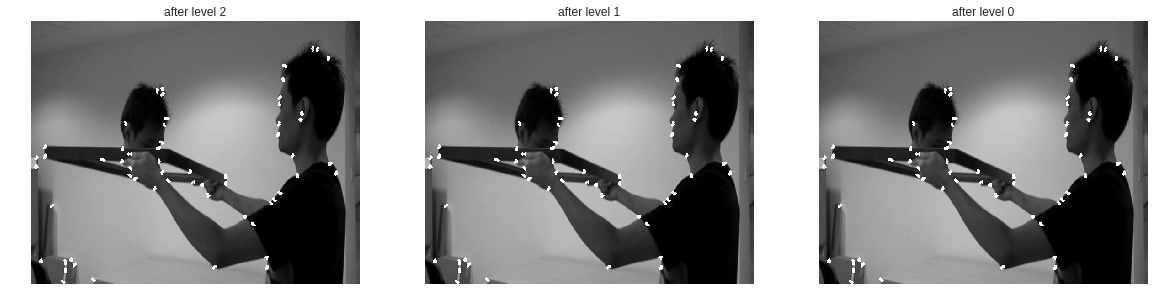

In [9]:
#plot the images  


plt.figure(figsize=(20, 30), facecolor='white')

plt.subplot(1, 3, 1)
plt.imshow(image4, 'gray')
plt.title('after level 2')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image6, 'gray')
plt.title('after level 1')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image8, 'gray')
plt.title('after level 0')
plt.axis("off")

plt.show()